# Analysing galaxies that have been re-fitted with LZIFU

Objectives:
* Determine the characteristics of the 2nd component in star-forming galaxies
* Determine whether emission line components with different spectral classifications lie in different regions of the WHAV* diagram.


In [1]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist

from spaxelsleuth.loaddata.lzifu import load_lzifu_galaxy
from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

import matplotlib
from matplotlib import rc, rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 14})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [2]:
# Options
fig_path = "/priv/meggs3/u5708159/SAMI/figs/individual_plots/"
savefigs = True
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"   # Options: "1" or "recom"


In [3]:
# Load the SAMI sample
df_sami = load_sami_galaxies(ncomponents="recom",
                             bin_type="default",
                             eline_SNR_min=5, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [5]:
# List all galaxies we have LZIFU data for
lzifu_data_path = "/priv/meggs3/u5708159/LZIFU/products/"
gals_lzifu = [int(f.split("_merge_lzcomp.fits")[0]) for f in os.listdir(lzifu_data_path) if f.endswith("merge_lzcomp.fits") and not f.startswith("._")]    
gals_shortlist = [64553, 106717, 30346, 41144, 609396, 9388000219, 144491, 106042, 240108, 184368, 8703, 544958, 460374, 537361, 144402, 204799, 463668, 85416, 463288, 511867, 24013, 561020, 144239, 298666, 288364, 176955, 84107, 585386, 99349, 287824, 610398, 551202, 240449, 55150, 69620, 534753, 14812, 545925, 105597, 3630097, 8353, 77754, 220439, 383318, 618116, 144051, 278548, 396833, 238358, 485834, 518782, 622744, 143814, 106376, 623432, 221375, 296829, 9091700139, 209698]
gals_good = [g for g in gals_shortlist if g in gals_lzifu]
_ = [print(g) for g in gals_good]


64553
106717
30346
41144
609396
9388000219
144491
106042
240108
184368
8703
544958
460374
537361
144402
204799
463668
85416
463288
511867
24013
561020
144239
298666
288364
176955
84107
585386
287824
610398
551202
240449
55150
69620
534753
14812
545925
105597
3630097
8353
77754
220439
383318
618116
144051
278548
396833
238358
485834
518782
622744
143814
106376
623432
221375
296829
9091700139
209698


In [70]:
###########################################################################
# Select a galaxy and load the DataFrame
###########################################################################
gal = 9388000219
df_gal = load_lzifu_galaxy(gal=gal, bin_type=bin_type, ncomponents=ncomponents,
                       eline_SNR_min=5,
                       sigma_gas_SNR_cut=True,
                       vgrad_cut=False,
                       stekin_cut=False)

df_gal.loc[df_gal["Number of components"] == 0, "Number of components"] = np.nan

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

# Summary "collage" plot for paper

9388000219 not in SDSS footprint!


Text(0.5, 0.98, '9388000219')

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


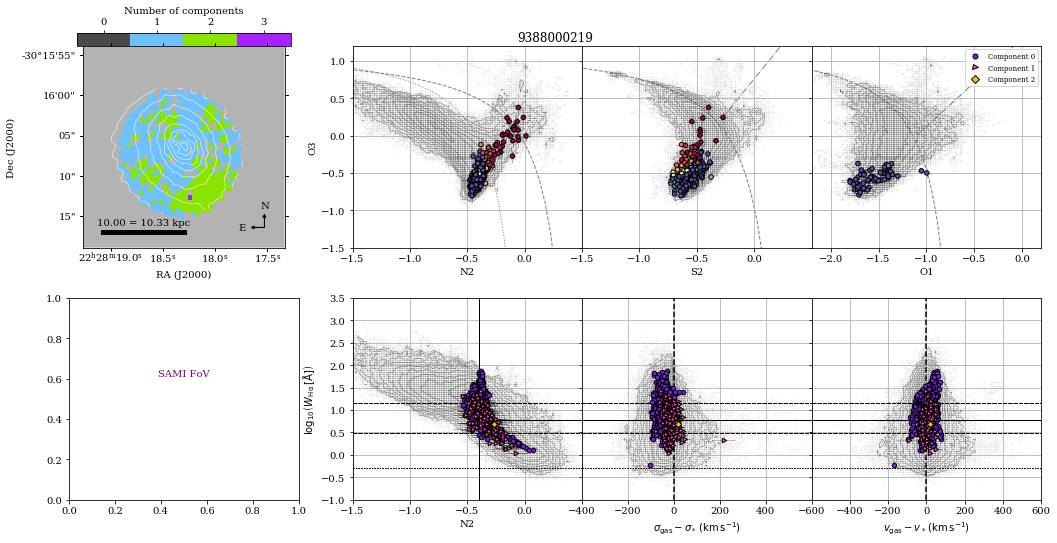

In [71]:
###########################################################################
# Collage figure
###########################################################################
markers = ["o", ">", "D"]
l = 0.05
b = 0.05
dw = 0.05
dh = 0.1
w = (1 - 2 * l - dw) / 4
h = (1 - 2 * b - dh) / 2

# Create the figure
fig = plt.figure(figsize=(15, 7))
ax_sdss = fig.add_axes([l, b, w, h])
ax_im = fig.add_axes([l, b + h + dh, w, h])
bbox = ax_im.get_position()
cax_im = fig.add_axes([bbox.x0 + bbox.width * 0.035, bbox.y0 + bbox.height, bbox.width * 0.93, 0.025])
axs_bpt = []
axs_bpt.append(fig.add_axes([l + w + dw, b + h + dh, w, h]))
axs_bpt.append(fig.add_axes([l + w + dw + w, b + h + dh, w, h]))
axs_bpt.append(fig.add_axes([l + w + dw + 2 * w, b + h + dh, w, h]))
# cax_bpt = fig.add_axes(([l + w + dw + 3 * w, b + h + dh, 0.025, h]))
axs_whav = []
axs_whav.append(fig.add_axes([l + w + dw, b, w, h]))
axs_whav.append(fig.add_axes([l + w + dw + w, b, w, h]))
axs_whav.append(fig.add_axes([l + w + dw + 2 * w, b, w, h]))
# cax_whav = fig.add_axes(([l + w + dw + 3 * w, b, 0.025, h]))

# SDSS image
plot_sdss_image(df_gal, ax=ax_sdss)
ax_sdss.text(s="SAMI FoV", x=0.5, y=0.6, 
             horizontalalignment="center",
             verticalalignment="bottom", color="purple",
             transform=ax_sdss.transAxes, zorder=89423423423)

# Plot the number of components fitted.
plot2dmap(df_gal=df_gal, bin_type="default", survey="sami",
          PA_deg=0,
          col_z="Number of components", 
          ax=ax_im, cax=cax_im, cax_orientation="horizontal", show_title=False)
ax_im.text(s=f"{gal}", x=0.9, y=0.9, horizontalalignment="right", verticalalignment="top", transform=ax_im.transAxes)

# Plot BPT diagram
col_y = "log O3"
col_z = "HALPHA EW"
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami, 
                       col_x=f"{col_x} (total)",
                       col_y=f"{col_y} (total)", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=axs_bpt[cc], plot_colorbar=False)

    # Add BPT functions
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot LZIFU measurements
    for ii in range(3):
        plot2dscatter(df=df_gal,
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})"  in df_gal else col_z,
                      marker=markers[ii], 
#                       markerfacecolour=component_colours[ii],
                      ax=axs_bpt[cc],
                      markersize=20,  edgecolors="black",
                      plot_colorbar=False)

# Decorations
[ax.grid() for ax in axs_bpt]
[ax.set_ylabel("") for ax in axs_bpt[1:]]
[ax.set_yticklabels([]) for ax in axs_bpt[1:]]
[ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs_bpt[:-1]]
[ax.collections[0].set_rasterized(True) for ax in axs_bpt]

# Plot WHAN, WHAV and WHAV* diagrams.
col_y = "log HALPHA EW"
col_z = None

# Plot LZIFU measurements
for cc, col_x in enumerate(["log N2", "sigma_gas - sigma_*", "v_gas - v_*"]):
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami, col_x=f"{col_x} (total)" if col_x == "log N2" else f"{col_x}",
                       col_y=f"{col_y} (total)" if col_x == "log N2" else f"{col_y}",
                       col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r", ax=axs_whav[cc],
                       plot_colorbar=False)
    # Plot the S7 data
    for ii in range(3):
        plot2dscatter(df=df_gal,
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})"  in df_gal else col_z,
                      marker=markers[ii], ax=axs_whav[cc],
                      markersize=20, markerfacecolour=component_colours[ii], edgecolors="black",
                      plot_colorbar=False)

# Decorations
[ax.grid() for ax in axs_whav]
[ax.set_ylabel("") for ax in axs_whav[1:]]
[ax.set_yticklabels([]) for ax in axs_whav[1:]]
[ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs_whav[:-1]]
[ax.axvline(0, ls="--", color="k") for ax in axs_whav[1:]]

# Legend
legend_elements = [Line2D([0], [0], marker=markers[ii], 
                          color="none", markeredgecolor="black",
                          label=f"Component {ii}", 
                          markerfacecolor=component_colours[ii], markersize=5) for ii in range(3)]
axs_bpt[-1].legend(handles=legend_elements, fontsize="x-small", loc="upper right")

fig.suptitle(gal)

# Save 
# if savefigs:
#     fig.savefig(os.path.join(fig_path, f"{gal}_LZIFU_summary"), format="pdf", bbox_inches="tight")

# Scatter plot: line ratios vs. velocity dispersion

[None, None, None, None, None, None, None, None]

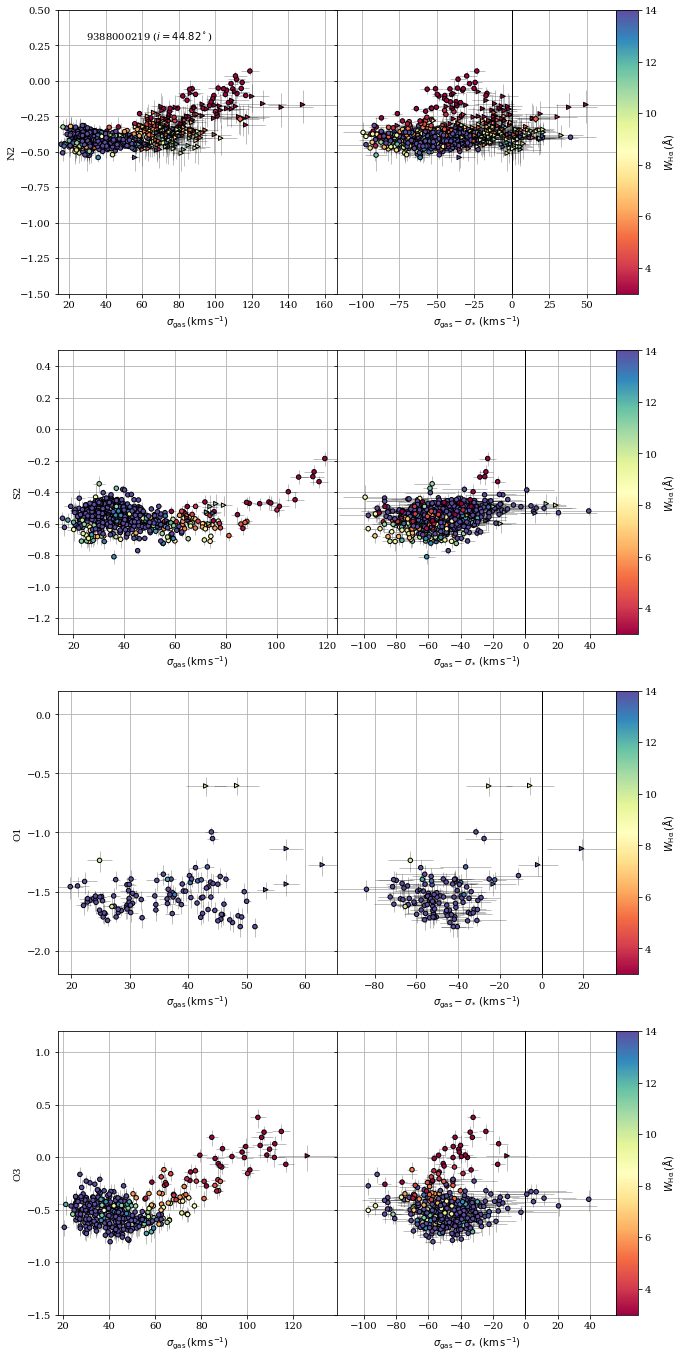

In [79]:
col_y_list = ["log N2", "log S2", "log O1", "log O3"]
fig, axs = plt.subplots(nrows=len(col_y_list), ncols=2, figsize=(10, 6 * len(col_y_list)))
fig.subplots_adjust(wspace=0)
caxs = []
for rr in range(len(col_y_list)):
    bbox = axs[rr][1].get_position()
    caxs.append(fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height]))

# log N2, S2, O1 vs. velocity dispersion
axs[0][0].text(s=f"{gal} ($i = {df_gal['Inclination i (degrees)'].unique()[0]:.2f}^\circ$)", x=0.1, y=0.9, transform=axs[0][0].transAxes)
for rr, col_y in enumerate(col_y_list):
    for ii in range(3):
        plot2dscatter(df=df_gal, 
                      col_x=f"sigma_gas (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=f"HALPHA EW (component {ii})",
                      marker=markers[ii], markerfacecolour=component_colours[ii], edgecolors="black",
                      ax=axs[rr][0], plot_colorbar=False)
        plot2dscatter(df=df_gal, 
                      col_x=f"sigma_gas - sigma_* (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=f"HALPHA EW (component {ii})",
                      marker=markers[ii], markerfacecolour=component_colours[ii], edgecolors="black",
                      ax=axs[rr][1], plot_colorbar=True if ii == 2 else False, cax_orientation="vertical",
                      cax=caxs[rr]) 
        axs[rr][1].set_ylabel("")
        axs[rr][1].set_yticklabels([])
[ax.grid() for ax in axs.flat]
[ax.autoscale(axis="x", enable=True, tight=True) for ax in axs.flat]

# 2D maps: H$\alpha$ flux, $v_{\rm gas}$, $\sigma_{\rm gas}$

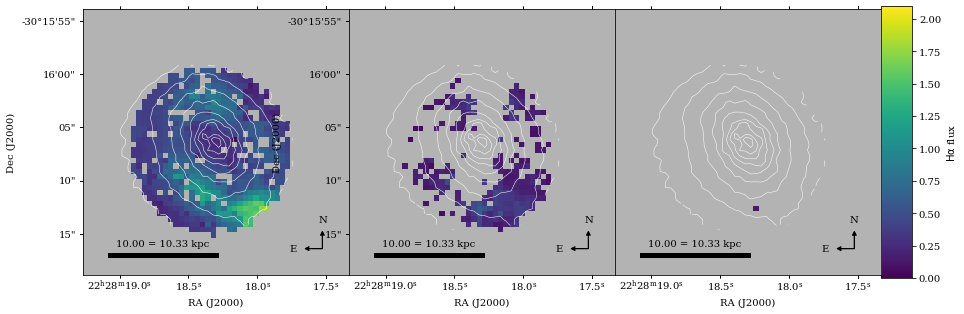

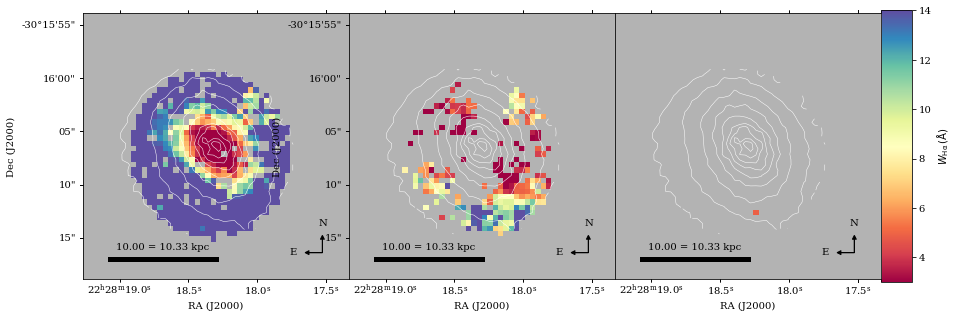

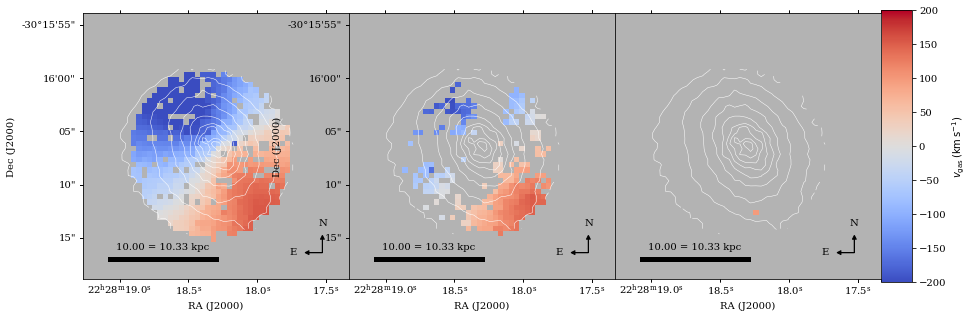

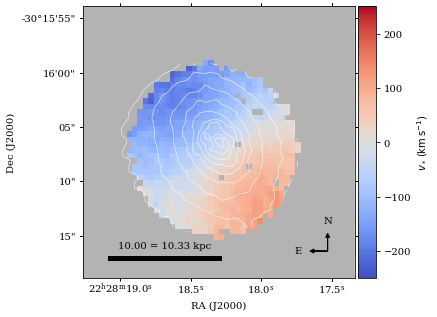

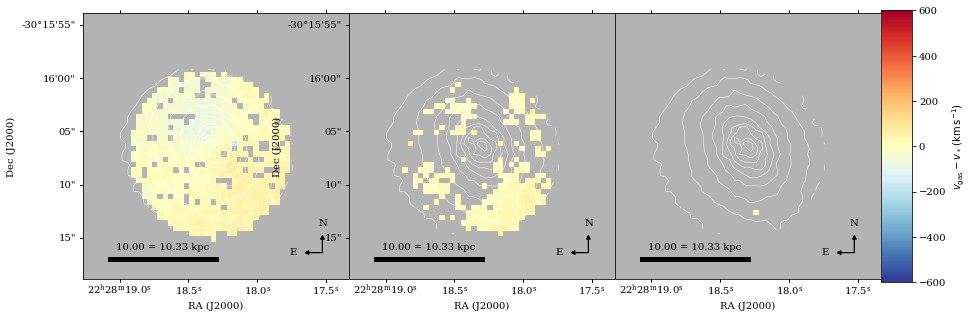

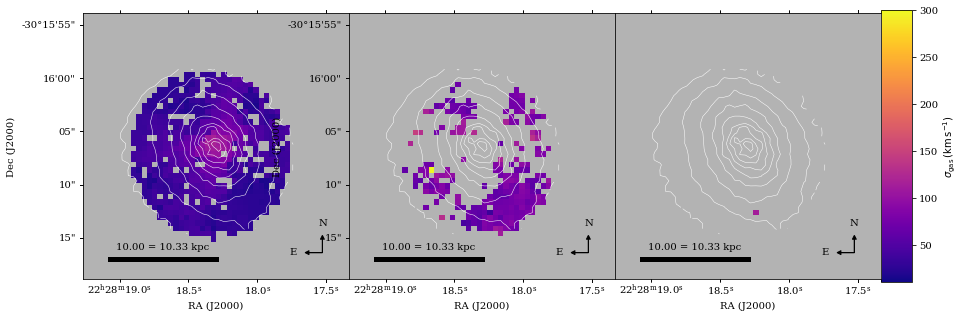

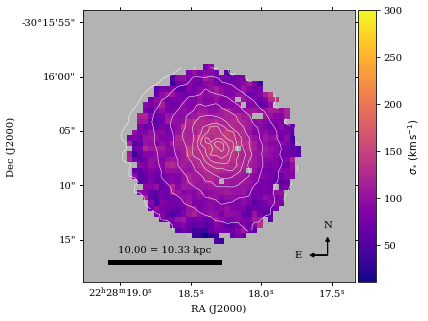

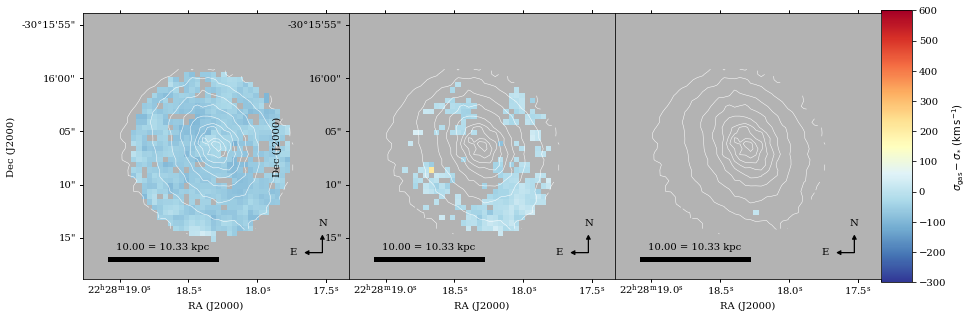

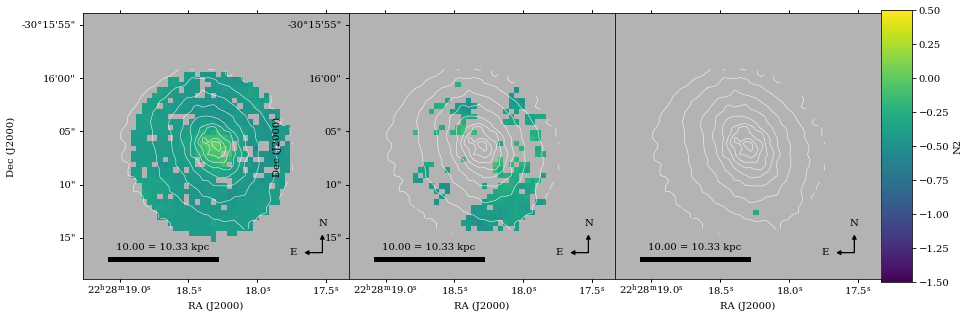

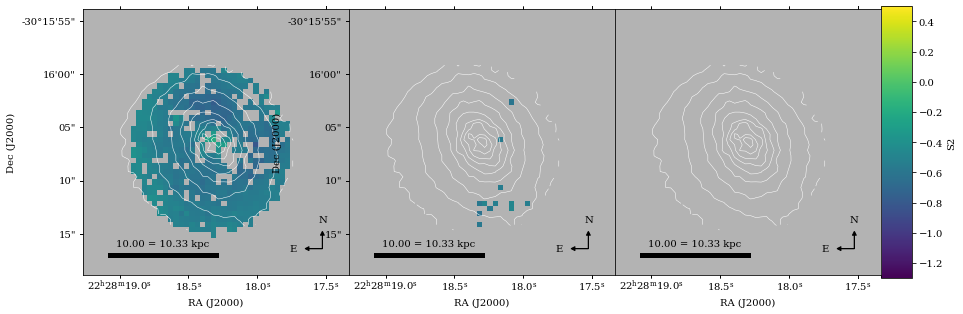

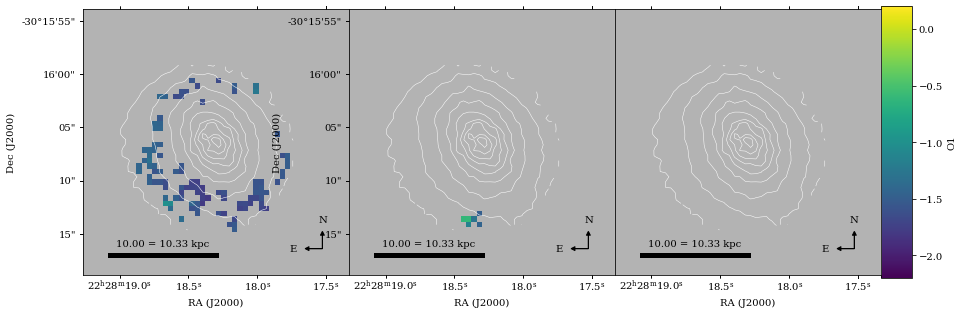

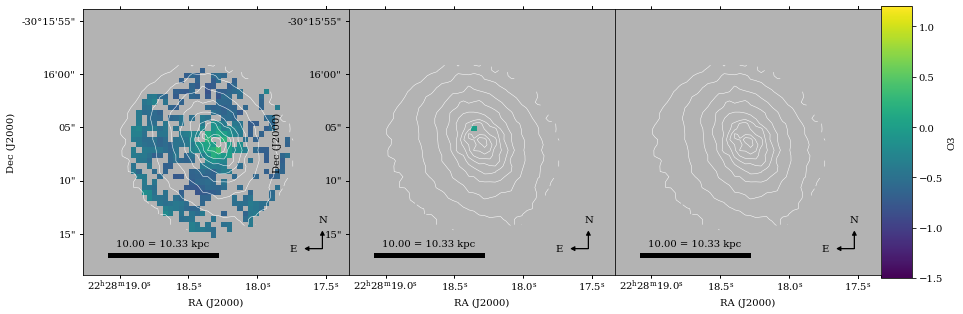

In [74]:
col_z_list = ["HALPHA", "HALPHA EW", 
              "v_gas", "v_*", "v_gas - v_*", 
              "sigma_gas", "sigma_*", "sigma_gas - sigma_*",
              "log N2", "log S2", "log O1", "log O3"]
for col_z in col_z_list:
    
    if f"{col_z} (component {ii})" in df_gal.columns:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14.3, 5))
        fig.subplots_adjust(wspace=0)
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        for ii in range(3):
            plot2dmap(df_gal=df_gal, bin_type="default", survey="sami", 
                      col_z=f"{col_z} (component {ii})",
                      vmax=np.nanmax(df_gal["HALPHA (total)"]) if col_z == "HALPHA" else None, 
                      ax=axs[ii], show_title=False, plot_colorbar=True if ii == 2 else False, cax=cax)
            
        # Decorations
        if ii > 0:
            # Turn off axis labels
            lat = plt.gca().coords[1]
            lat.set_ticks_visible(False)
            lat.set_ticklabel_visible(False)

    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.05, bbox.height])

        plot2dmap(df_gal=df_gal, bin_type="default", survey="sami", 
                  col_z=col_z, 
                  ax=ax, show_title=False, plot_colorbar=True, cax=cax)



In [75]:
print(df_gal["RA (J2000)"].unique())
print(df_gal["Dec (J2000)"].unique())

[337.0762329]
[-30.2684536]


# *Appendix: comparison with SAMI data*

/home/u5708159/python/Modules/spaxelsleuth/plotting/plot2dmap.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gal["x, y (pixels)"] = list(zip(df_gal["x (projected, arcsec)"] / as_per_px, df_gal["y (projected, arcsec)"] / as_per_px))


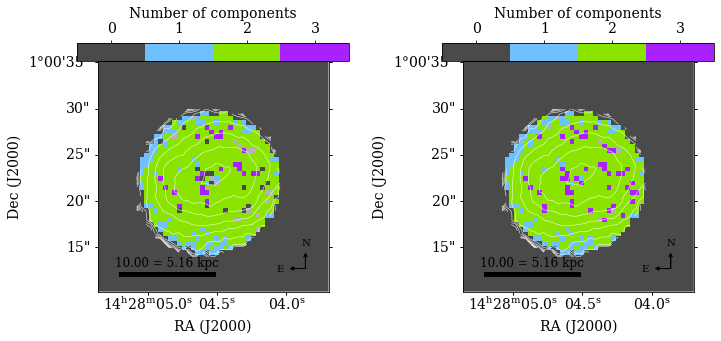

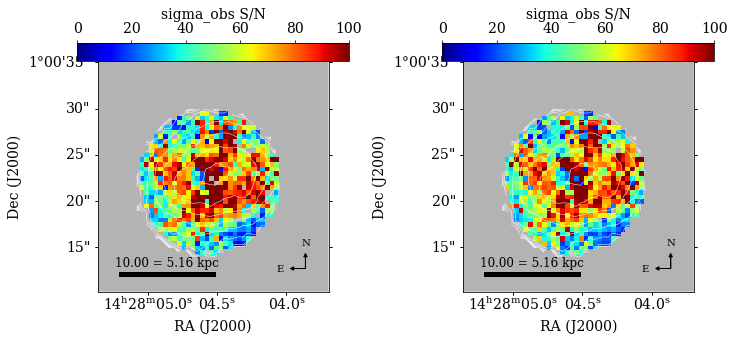

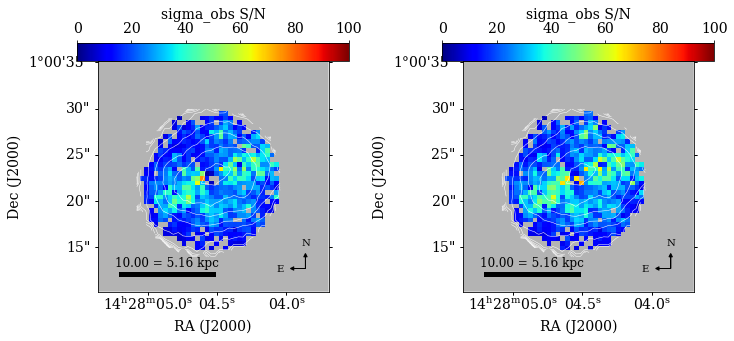

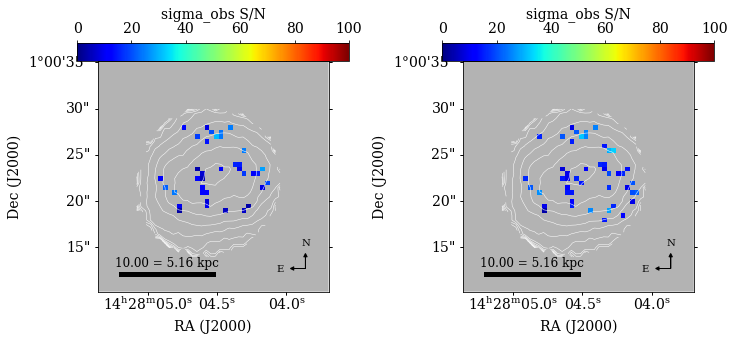

In [76]:
# Get SAMI data for this galaxy
df_gal_sami = df_sami[df_sami["ID"] == gal]

# Make 2D maps showing number of components
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
col_z = "Number of components" 
# LZIFU
plot2dmap(df_gal=df_gal, bin_type="default", survey="sami", 
          col_z=f"{col_z}", 
          ax=axs[0], 
          show_title=False, plot_colorbar=True, cax_orientation="horizontal")
# SAMI
plot2dmap(df_gal=df_gal_sami, bin_type="default", survey="sami", 
          col_z=f"{col_z}", 
          ax=axs[1],
          show_title=False, plot_colorbar=True, cax_orientation="horizontal")

# Make 2D maps showing sigma_obs S/N
col_z = "sigma_obs S/N" 
for ii in range(3):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    # LZIFU
    plot2dmap(df_gal=df_gal, bin_type="default", survey="sami", 
              col_z=f"{col_z} (component {ii})", 
              ax=axs[0], vmin=0, vmax=100,
              show_title=False, plot_colorbar=True, cax_orientation="horizontal")
    # SAMI
    plot2dmap(df_gal=df_gal_sami, bin_type="default", survey="sami", 
              col_z=f"{col_z} (component {ii})", 
              ax=axs[1], vmin=0, vmax=100,
              show_title=False, plot_colorbar=True, cax_orientation="horizontal")
    